In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [2]:
NOTEBOOK_DIR = Path().resolve()
BASE_DIR = NOTEBOOK_DIR.parents[0]

DATASET_DIR = BASE_DIR / "data" / "1"
TRAIN_FILE_PATH = DATASET_DIR / "mitbih_train.csv"
TEST_FILE_PATH = DATASET_DIR / "mitbih_test.csv"

print("BAse directory of this project : ",BASE_DIR)
print("Train Dataset :",TRAIN_FILE_PATH)

BAse directory of this project :  /home/srirama/sr_proj/ECGHeartbeatCategorization
Train Dataset : /home/srirama/sr_proj/ECGHeartbeatCategorization/data/1/mitbih_train.csv


In [3]:
train_df = pd.read_csv(TRAIN_FILE_PATH, header=None)
test_df = pd.read_csv(TEST_FILE_PATH, header=None)
train_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
18481,1.000000,0.833049,0.178876,0.003407,0.253833,0.327087,0.274276,0.270869,0.287905,0.282794,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66838,0.959002,0.868093,0.221034,0.000000,0.222816,0.315508,0.279857,0.263815,0.263815,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76787,0.986622,1.000000,0.817726,0.399666,0.055184,0.000000,0.105351,0.142140,0.125418,0.117057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
59100,0.948320,0.806202,0.351421,0.015504,0.093023,0.100775,0.103359,0.072351,0.095607,0.074935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34326,1.000000,0.882000,0.528000,0.288000,0.262000,0.206000,0.158000,0.156000,0.172000,0.166000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print("Columns are : \n",train_df.columns)
print("Shape :",train_df.shape)
print("Null values : ",train_df.isnull().sum().sum())
print("Total duplicates : ",train_df.duplicated().sum())
train_df.describe()

Columns are : 
 Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
      dtype='int64', length=188)
Shape : (87554, 188)
Null values :  0
Total duplicates :  0


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [5]:
NUM_CLASSES = 5 
CLASS_NAMES = ['N (0) - Normal', 'S (1) - SVEB', 'V (2) - VEB', 'F (3) - Fusion', 'Q (4) - Unknown'] # From Kaggle
# Statistical summary
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


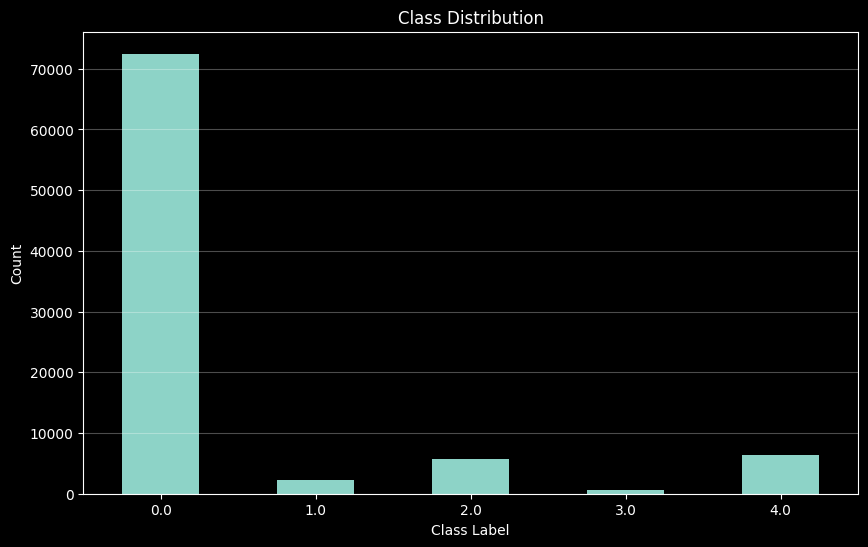

Class distribution:
187
0.0    72471
1.0     2223
2.0     5788
3.0      641
4.0     6431
Name: count, dtype: int64


In [16]:
# Check class distribution (last column is typically the label)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
train_df.iloc[:, -1].value_counts().sort_index().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()
# Display class counts
print("Class distribution:")
print(train_df.iloc[:, -1].value_counts().sort_index())

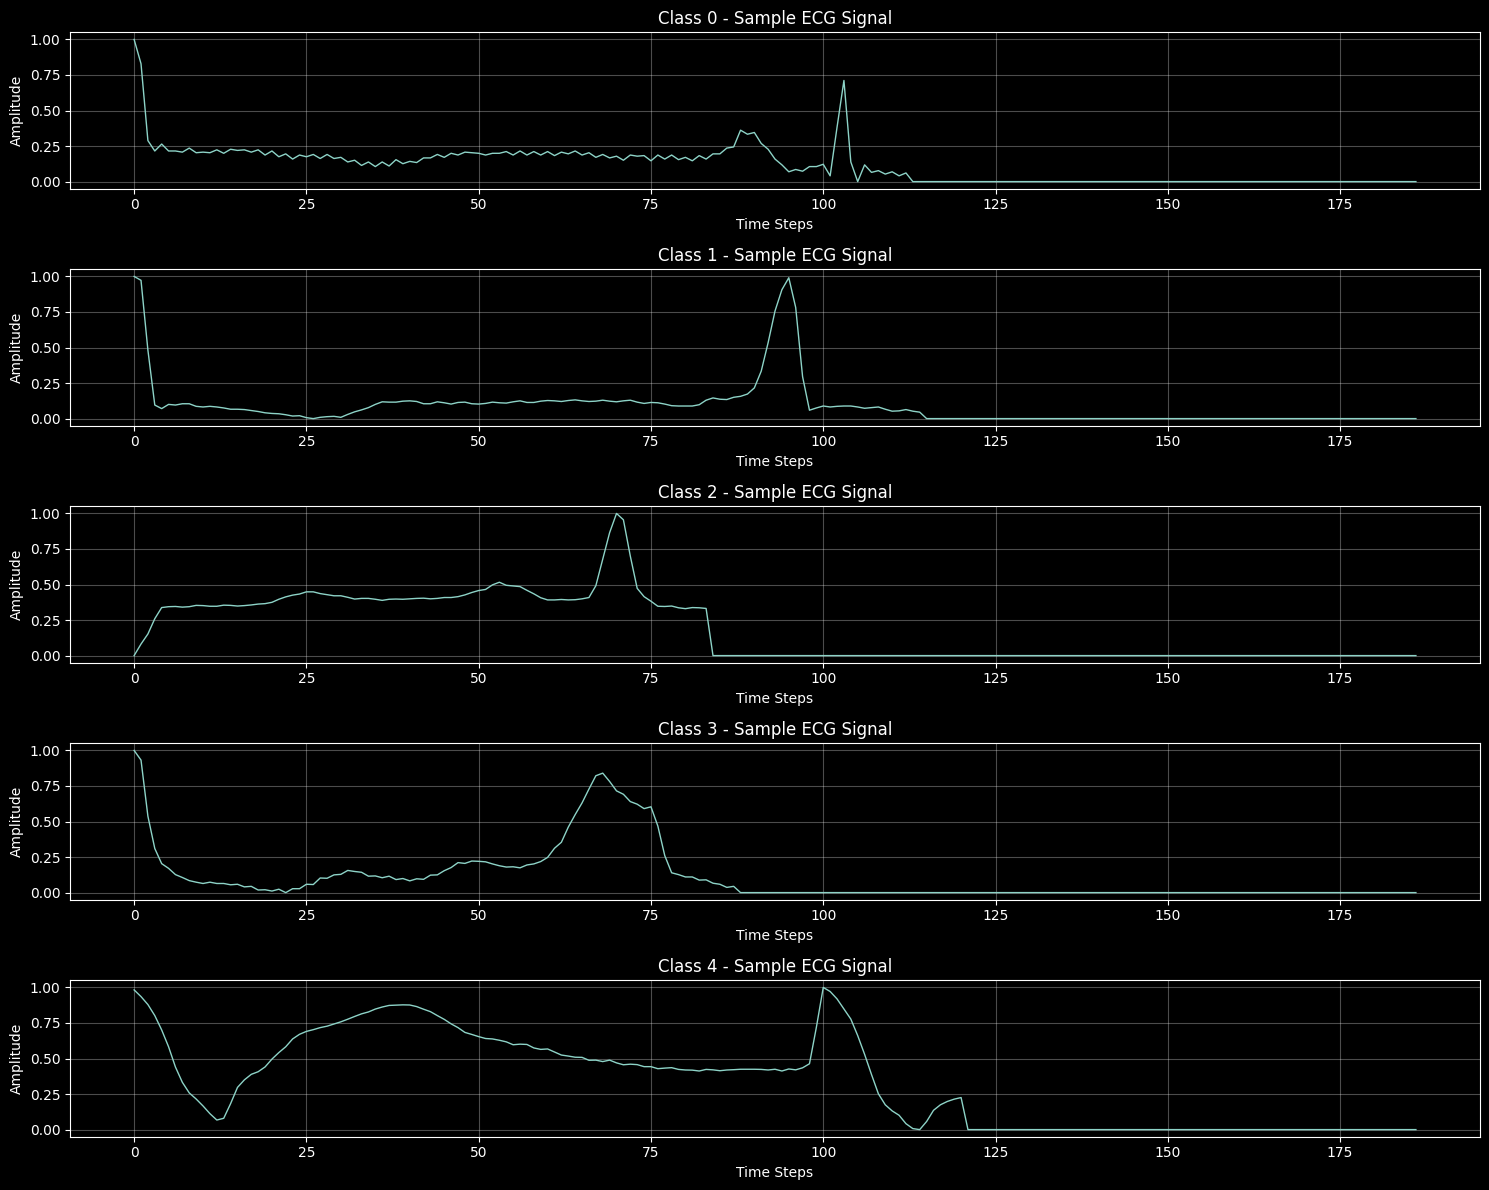

In [9]:
# Visualize sample ECG signals from each class
fig, axes = plt.subplots(5, 1, figsize=(15, 12))
classes = train_df.iloc[:, -1].unique()

for idx, class_label in enumerate(sorted(classes)):
    sample = train_df[train_df.iloc[:, -1] == class_label].sample(1)
    signal = sample.iloc[0, :-1].values
    
    axes[idx].plot(signal, linewidth=1)
    axes[idx].set_title(f'Class {int(class_label)} - Sample ECG Signal')
    axes[idx].set_xlabel('Time Steps')
    axes[idx].set_ylabel('Amplitude')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

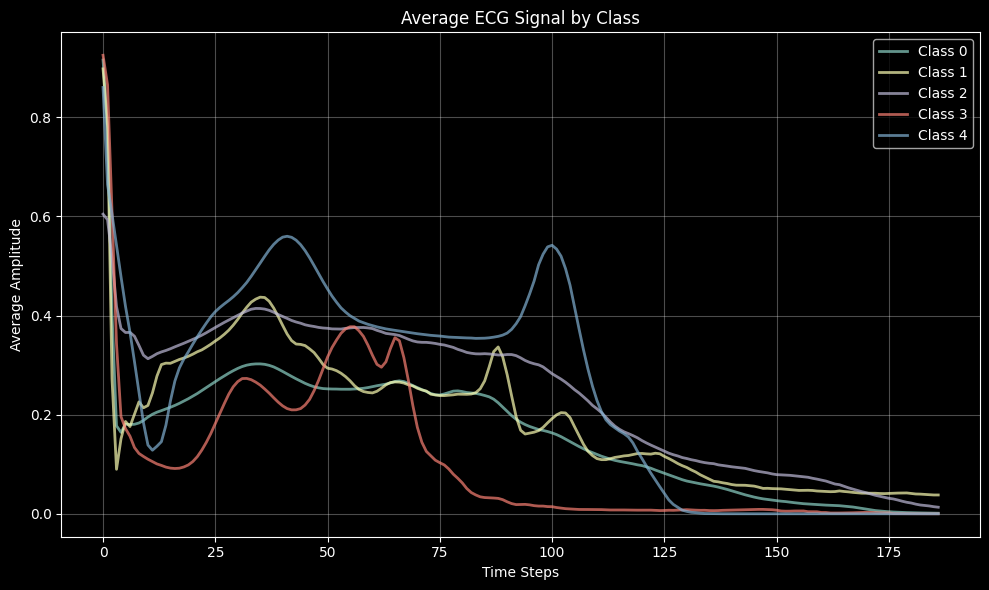

In [17]:
# Average signal per class
plt.figure(figsize=(10,6))
for class_label in sorted(train_df.iloc[:, -1].unique()):
    avg_signal = train_df[train_df.iloc[:, -1] == class_label].iloc[:, :-1].mean()
    plt.plot(avg_signal, label=f'Class {int(class_label)}', linewidth=2, alpha=0.7)

plt.title('Average ECG Signal by Class')
plt.xlabel('Time Steps')
plt.ylabel('Average Amplitude')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [45]:
# Separate features (X) and labels (y)
X_train_raw = train_df.iloc[:, :-1].values
y_train_raw = train_df.iloc[:, -1].values
X_test_raw = test_df.iloc[:, :-1].values
y_test_raw = test_df.iloc[:, -1].values

In [46]:
print(f"Original Training data shape: {X_train_raw.shape}")
print(f"Class distribution before balancing:\n{train_df.iloc[:, -1].value_counts(normalize=True).sort_index()}")

Original Training data shape: (87554, 187)
Class distribution before balancing:
187
0.0    0.827729
1.0    0.025390
2.0    0.066108
3.0    0.007321
4.0    0.073452
Name: proportion, dtype: float64
